## Notebook by Hari Prasath V

## Task Explantion

Predict the percentage of an student based on the no. of study hours. Build a model using ML and predict what will be the score of the student if a student studies for 9.25 hrs/ day?

## Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Load data

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Checking for missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No values missing values has been found. Let's look at the statistics of the data

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization

Text(0, 0.5, 'Scores in percentage')

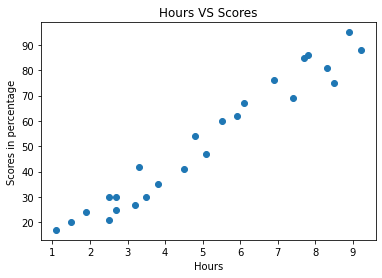

In [6]:
plt.plot(data['Hours'], data['Scores'], 'o')
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores in percentage')

In [7]:
data.corr()['Scores']

Hours     0.976191
Scores    1.000000
Name: Scores, dtype: float64

From the plot and the above corelation, it is seen that there is a strong positive corelation between hours and scores.

In [8]:
x = data[['Hours']].values
y = data.loc[:, 'Scores'].values

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

## Training

In [10]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluation

In [11]:
y_pred = reg.predict(xtest)
result = pd.DataFrame({'Hours': xtest.reshape(-1), 'Actual':ytest, 'Predicted':y_pred})
result

,Hours,Actual,Predicted
0,8.5,75,85.578002
1,3.3,42,34.743825
2,3.8,35,39.631726
3,7.4,69,74.824618
4,2.5,21,26.923182


In [12]:
print('Mean Squared Error: {:.2f}\nMean Absolute Error: {:.2f}'.format(mean_squared_error(y_pred, ytest), mean_absolute_error(y_pred, ytest)))

Mean Squared Error: 51.00
Mean Absolute Error: 6.84


Let's visualize the model.

Text(0, 0.5, 'Scores in percentage')

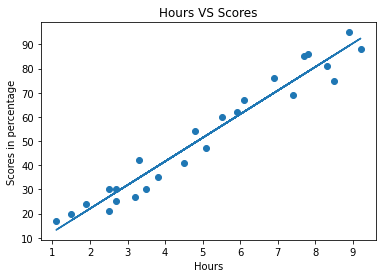

In [13]:
reg_model = reg.intercept_ + reg.coef_ * x
plt.scatter(x, y)
plt.plot(x, reg_model)
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores in percentage')

Now that the model has been built, lets predict score for a student who studies for 9.5 hrs.

In [14]:
hrs = [9.25]
print('Student score if the student studied for {} hrs is {:.2f}.'.format(*hrs, *reg.predict([hrs])))

Student score if the student studied for 9.25 hrs is 92.91.
